Dataset yang digunakan adalah https://www.kaggle.com/datasets/gauravduttakiit/e-commerce-forecasting-for-sales. Dalam Proyek ini saya akan membuat sebuah model untuk memprdiksi jumlah pernjualan di masa yang akan datang.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,26/09/24,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0
1,26/09/24,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0
2,26/09/24,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0
3,26/09/24,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0
4,22/09/24,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0


In [4]:
test.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,15/12/24,Automotive,BrandA,6.0,1.0,48.8,150.23,43.58,302.39,NaN
1,15/12/24,Automotive,BrandA,6.0,1.0,79.2,344.84,15.17,322.33,NaN
2,07/12/24,Automotive,BrandA,5.0,0.0,56.2,459.79,24.89,92.22,NaN
3,07/12/24,Automotive,BrandA,5.0,0.0,78.0,117.05,31.89,100.16,NaN
4,03/12/24,Automotive,BrandA,1.0,0.0,36.3,408.92,28.48,442.54,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18483 non-null  object 
 1   Category              18483 non-null  object 
 2   Brand                 18483 non-null  object 
 3   Day_of_Week           18483 non-null  int64  
 4   Holiday_Indicator     18483 non-null  int64  
 5   Past_Purchase_Trends  18483 non-null  float64
 6   Price                 18483 non-null  float64
 7   Discount              18483 non-null  float64
 8   Competitor_Price      18483 non-null  float64
 9   Sales_Quantity        18019 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1052 non-null   object 
 1   Category              1052 non-null   object 
 2   Brand                 1052 non-null   object 
 3   Day_of_Week           1052 non-null   float64
 4   Holiday_Indicator     1052 non-null   float64
 5   Past_Purchase_Trends  1052 non-null   float64
 6   Price                 1052 non-null   float64
 7   Discount              1052 non-null   float64
 8   Competitor_Price      1052 non-null   float64
 9   Sales_Quantity        0 non-null      float64
dtypes: float64(7), object(3)
memory usage: 84.5+ KB


In [7]:
train.describe()

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18019.000000
mean,2.991235,0.142022,52.329465,275.111184,27.490937,259.858758,255.665631
std,2.000765,0.349083,27.410577,129.733609,13.022521,126.653165,141.179795
min,0.000000,0.000000,5.000000,50.070000,5.000000,40.070000,10.000000
25%,1.000000,0.000000,28.900000,163.315000,16.265000,149.530000,133.500000
50%,3.000000,0.000000,52.500000,275.150000,27.600000,260.260000,257.000000
75%,5.000000,0.000000,75.700000,387.650000,38.690000,368.520000,377.000000
max,6.000000,1.000000,100.000000,499.900000,49.990000,479.990000,499.000000


In [8]:
# Menghapus variabel date pada data train dan test
train = train.drop('Date', axis=1)
test = test.drop('Date', axis=1)

In [9]:
# Mengecek apakah ada missing value pada data train
train.isnull().sum()

,0
Category,0
Brand,0
Day_of_Week,0
Holiday_Indicator,0
Past_Purchase_Trends,0
Price,0
Discount,0
Competitor_Price,0
Sales_Quantity,464


In [10]:
# Mengecek apakah ada missing value pada data train
test.isnull().sum()

,0
Category,28
Brand,28
Day_of_Week,28
Holiday_Indicator,28
Past_Purchase_Trends,28
Price,28
Discount,28
Competitor_Price,28
Sales_Quantity,1080


In [11]:
# Menghapus baris yang terdapat missing value
train_clean = train.dropna()
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18019 entries, 0 to 18482
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              18019 non-null  object 
 1   Brand                 18019 non-null  object 
 2   Day_of_Week           18019 non-null  int64  
 3   Holiday_Indicator     18019 non-null  int64  
 4   Past_Purchase_Trends  18019 non-null  float64
 5   Price                 18019 non-null  float64
 6   Discount              18019 non-null  float64
 7   Competitor_Price      18019 non-null  float64
 8   Sales_Quantity        18019 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.4+ MB


In [12]:
# Mendefinisan variabel berdasakan feature numerical dan categorical
numerical_features = ['Day_of_Week', 'Holiday_Indicator', 'Past_Purchase_Trends', 'Price', 'Discount', 'Competitor_Price', 'Sales_Quantity']
categorical_features = ['Category', 'Brand']

             jumlah sampel  persentase
Category                              
Beauty                2329        12.9
Clothing              2297        12.7
Toys                  2259        12.5
Automotive            2255        12.5
Sports                2255        12.5
Books                 2240        12.4
Home                  2199        12.2
Electronics           2185        12.1


<Axes: title={'center': 'Category'}, xlabel='Category'>

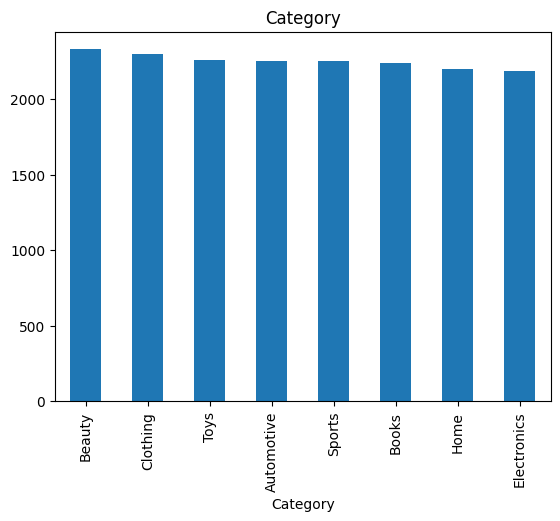

In [13]:
# EDA Unvariate Analysis
feature = categorical_features[0]
count = train_clean[feature].value_counts()
percent = 100*train_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

        jumlah sampel  persentase
Brand                            
BrandF           3082        17.1
BrandA           3072        17.0
BrandE           3072        17.0
BrandB           2937        16.3
BrandD           2937        16.3
BrandC           2919        16.2


<Axes: title={'center': 'Brand'}, xlabel='Brand'>

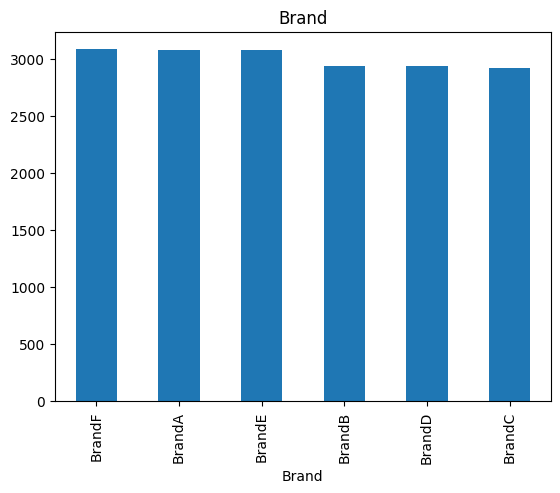

In [14]:
feature = categorical_features[1]
count = train_clean[feature].value_counts()
percent = 100*train_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

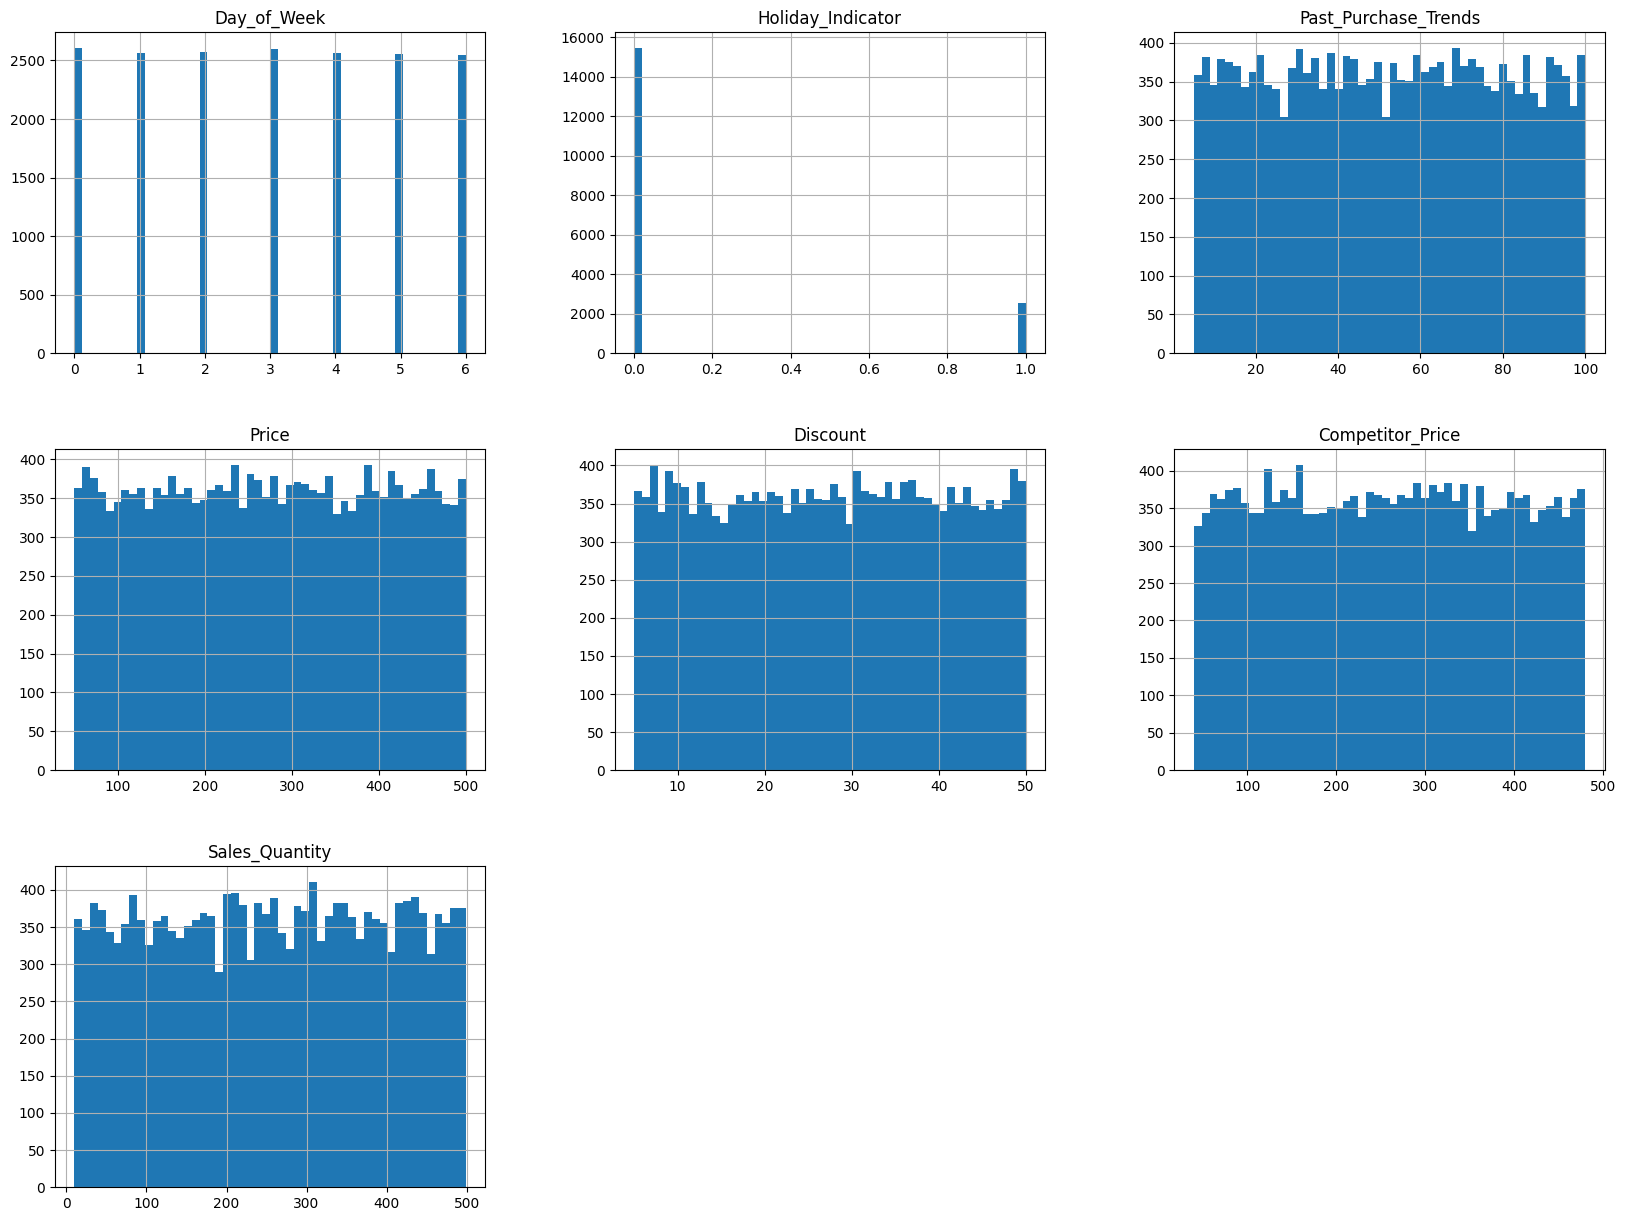

In [15]:
# Numerical Features
train_clean.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-16-65b2684e9d33>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Sales_Quantity", kind="bar", dodge=False, height = 4, aspect = 3, data=train_clean, palette="Set3")
<ipython-input-16-65b2684e9d33>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Sales_Quantity", kind="bar", dodge=False, height = 4, aspect = 3, data=train_clean, palette="Set3")


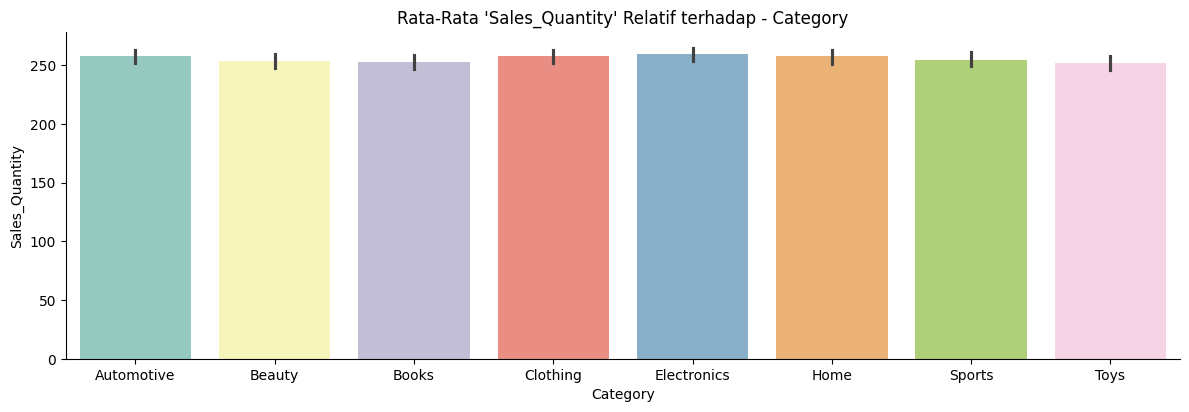

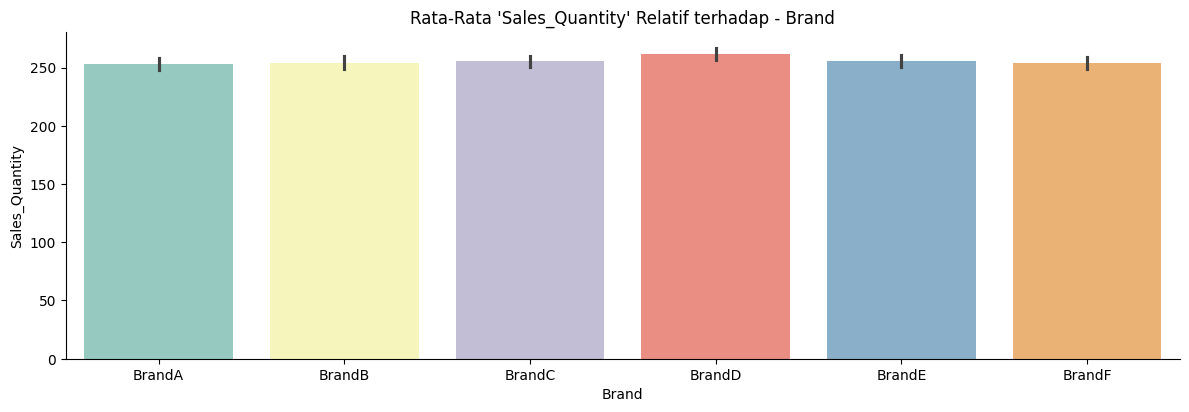

In [16]:
# EDA Multivariate Analysis
# Categorical terhadap Sales_Quantity

cat_features = train_clean.select_dtypes(include='object').columns.tolist()

for col in cat_features:
  sns.catplot(x=col, y="Sales_Quantity", kind="bar", dodge=False, height = 4, aspect = 3, data=train_clean, palette="Set3")
  plt.title("Rata-Rata 'Sales_Quantity' Relatif terhadap - {}".format(col))

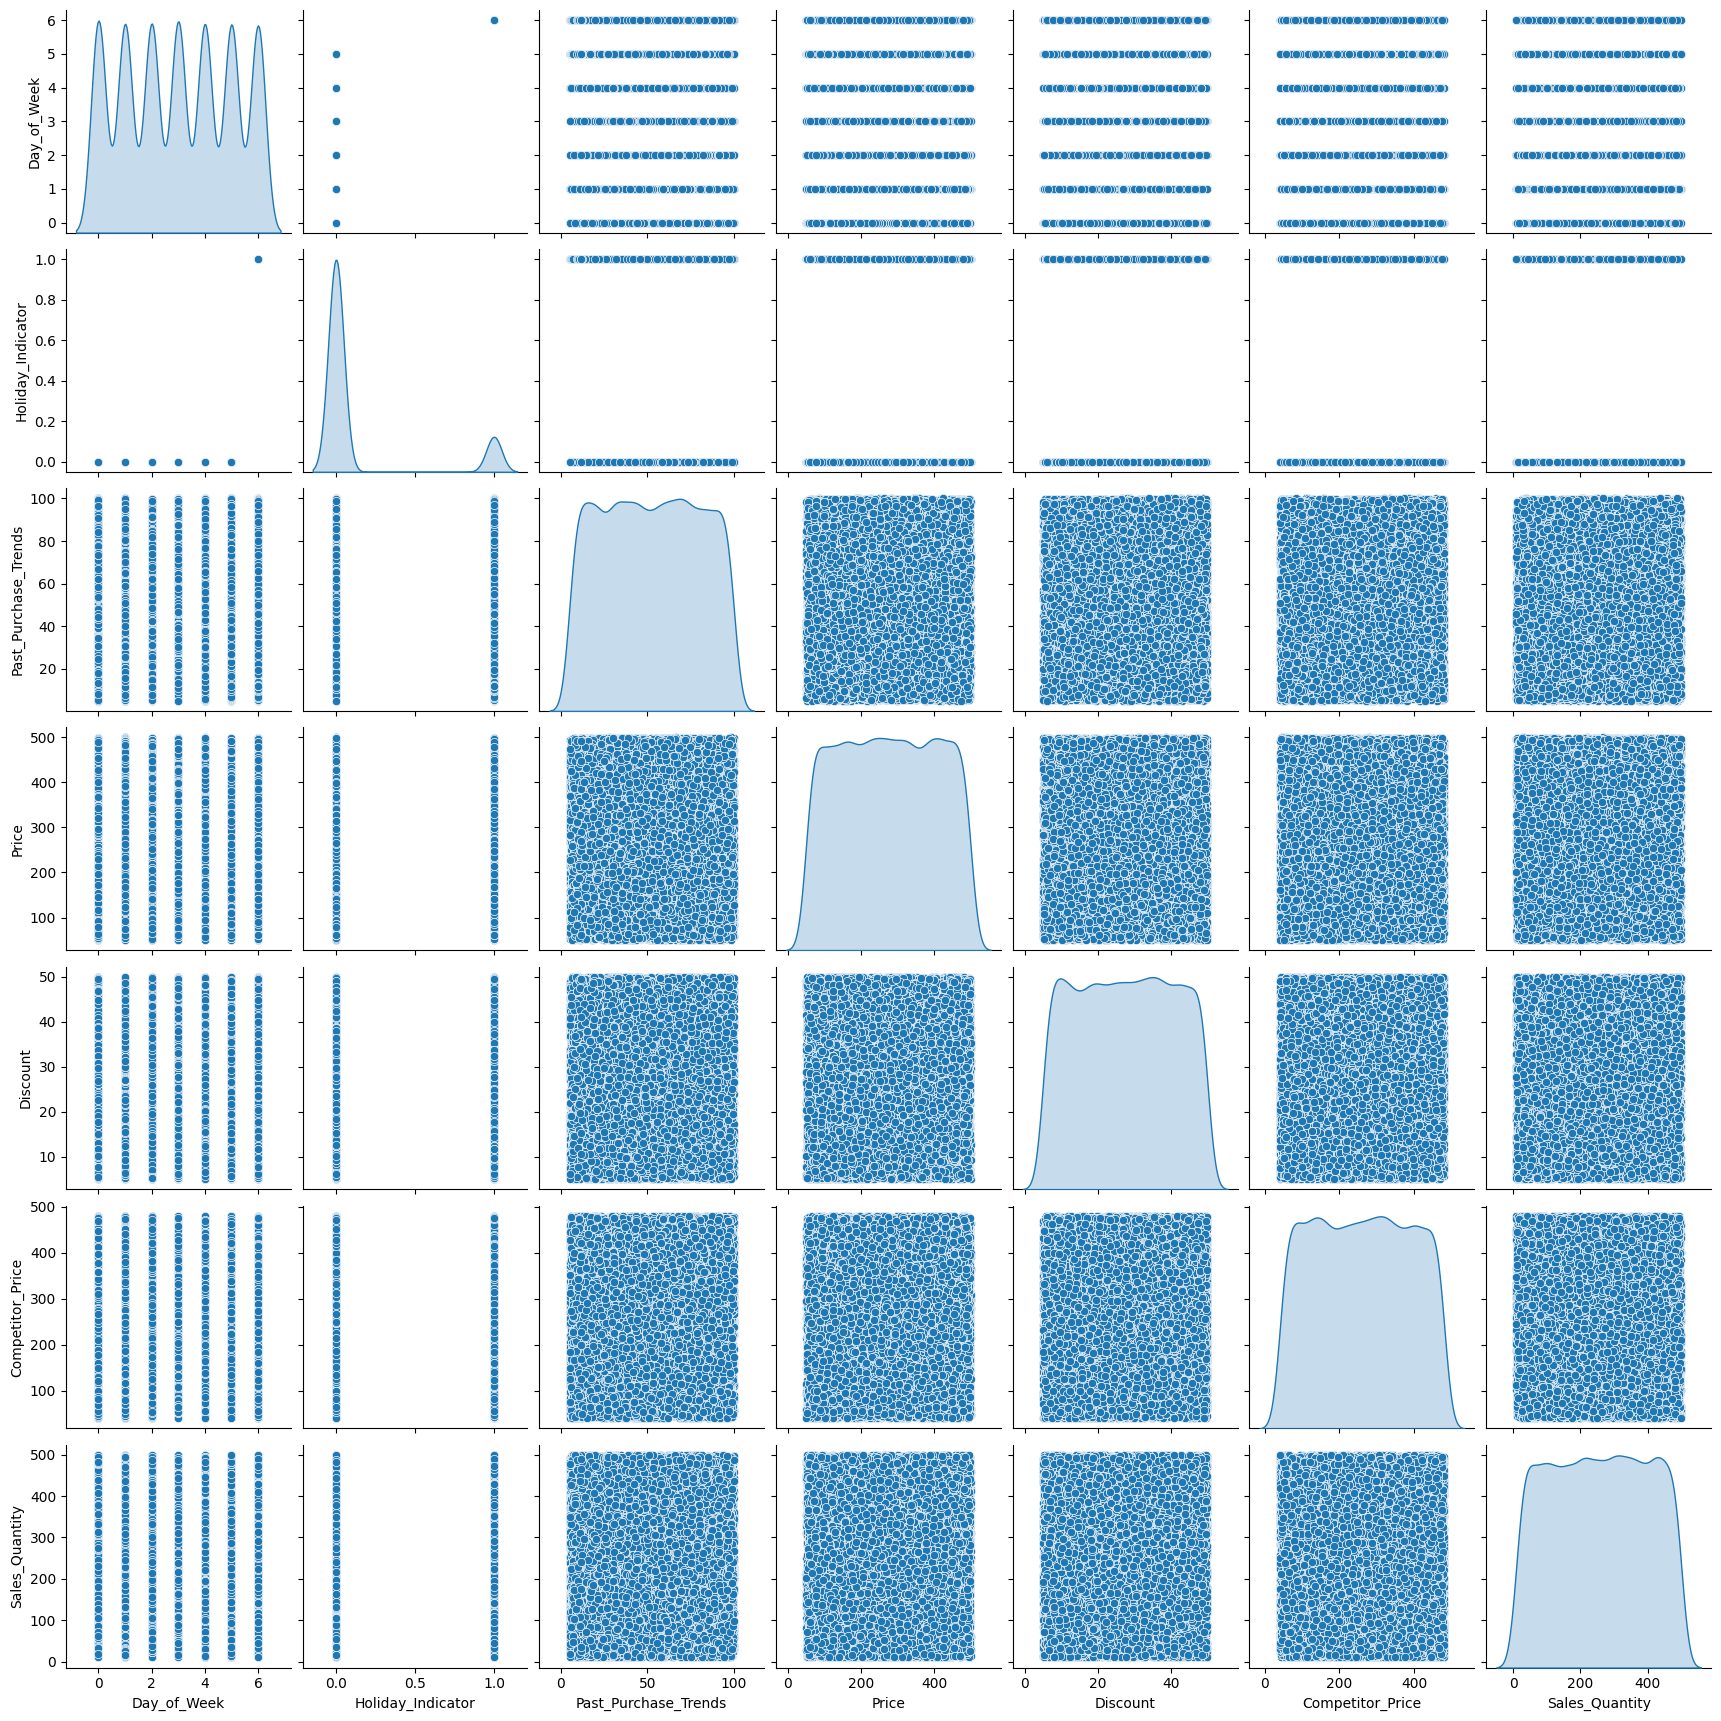

In [17]:
# Numerical Features
sns.pairplot(train_clean, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

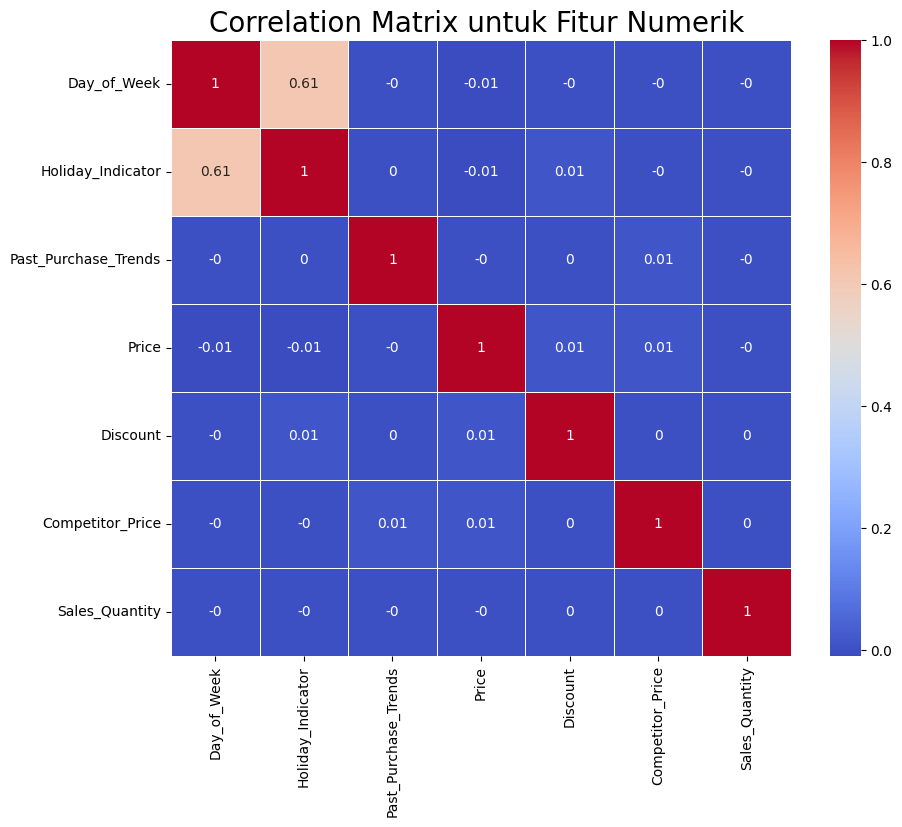

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_clean[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [19]:
# Normalisasi dan standarisasi data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [20]:
train = pd.get_dummies(train_clean, columns=categorical_features, dtype=int)
train

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,Category_Automotive,Category_Beauty,Category_Books,...,Category_Electronics,Category_Home,Category_Sports,Category_Toys,Brand_BrandA,Brand_BrandB,Brand_BrandC,Brand_BrandD,Brand_BrandE,Brand_BrandF
0,3,0,17.9,462.30,33.96,359.45,227.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,0,66.3,321.28,24.76,49.47,370.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,14.4,74.85,32.19,245.11,299.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,34.7,469.12,43.68,144.08,426.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6,1,93.5,221.76,36.79,478.07,470.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,3,0,22.0,266.55,18.33,383.05,359.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18479,2,0,48.4,481.87,23.41,469.83,333.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18480,1,0,50.7,123.81,46.73,214.11,132.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18481,0,0,73.4,77.95,10.07,82.28,274.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
test = pd.get_dummies(train_clean, columns=categorical_features, dtype=int)
test

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,Category_Automotive,Category_Beauty,Category_Books,...,Category_Electronics,Category_Home,Category_Sports,Category_Toys,Brand_BrandA,Brand_BrandB,Brand_BrandC,Brand_BrandD,Brand_BrandE,Brand_BrandF
0,3,0,17.9,462.30,33.96,359.45,227.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,0,66.3,321.28,24.76,49.47,370.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,14.4,74.85,32.19,245.11,299.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,34.7,469.12,43.68,144.08,426.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6,1,93.5,221.76,36.79,478.07,470.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,3,0,22.0,266.55,18.33,383.05,359.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18479,2,0,48.4,481.87,23.41,469.83,333.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18480,1,0,50.7,123.81,46.73,214.11,132.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
18481,0,0,73.4,77.95,10.07,82.28,274.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
from sklearn.model_selection import train_test_split

# Pisahkan X dan y dari train
X = train.drop("Sales_Quantity", axis=1)
y = train["Sales_Quantity"]

# Lakukan split ke data training dan validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
numerical_features = ['Day_of_Week', 'Holiday_Indicator', 'Past_Purchase_Trends', 'Price', 'Discount', 'Competitor_Price',]
scaler = StandardScaler()
scaler.fit_transform(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price
12458,1.016623,-0.402880,-0.742741,0.410122,-0.441720,-1.400562
3826,1.516832,2.482127,-0.037933,0.455090,-0.393410,0.763428
15895,-1.484421,-0.402880,-1.633793,1.058138,-0.341267,-0.721029
2010,-0.984212,-0.402880,1.528712,-1.257912,-0.720074,1.253171
16654,1.516832,2.482127,-1.261304,-0.895716,0.887170,-0.971254


In [24]:
train[numerical_features].describe().round(4)

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price
count,18019.0000,18019.0000,18019.0000,18019.0000,18019.0000,18019.0000
mean,2.9889,0.1415,52.3034,275.0092,27.4962,259.8045
std,2.0000,0.3486,27.3964,129.8704,13.0301,126.5285
min,0.0000,0.0000,5.0000,50.0700,5.0000,40.0700
25%,1.0000,0.0000,28.9000,162.9400,16.2700,149.7100
50%,3.0000,0.0000,52.5000,275.0100,27.6100,260.3800
75%,5.0000,0.0000,75.7000,387.7600,38.7000,368.1500
max,6.0000,1.0000,100.0000,499.9000,49.9900,479.9900


In [25]:
# Membuat model regresi
# Menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [27]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(X_train),y_true=y_train)

In [28]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [29]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [31]:
# Melakukan scaling pada fitur numerik pada X_valid sehingga memiliki rata-rata=0 dan varians=1
X_valid.loc[:,numerical_features] =  scaler.transform(X_valid[numerical_features])

<ipython-input-31-a6cb3262d534>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.51683159  0.51641398  0.01620517 ... -1.48442125 -1.48442125
  0.51641398]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_valid.loc[:,numerical_features] =  scaler.transform(X_valid[numerical_features])
<ipython-input-31-a6cb3262d534>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.48212687 -0.40288029 -0.40288029 ... -0.40288029 -0.40288029
 -0.40288029]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_valid.loc[:,numerical_features] =  scaler.transform(X_valid[numerical_features])


In [32]:
# Membuat variabel mse yang isinya adalah dataframe nilai mse data train dan test
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

# Membuat dictonary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Menghitung MSE masing-masing algoritma
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_valid, y_pred=model.predict(X_valid))/1e3

mse

,train,test
KNN,17.732982,22.173057
RF,13.352351,20.210571
Boosting,19.916025,19.92839


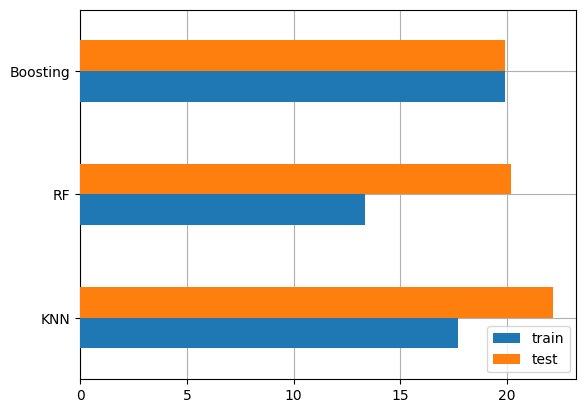

In [33]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [36]:
# Dummify test biar kolomnya sama dengan train
X_test = pd.get_dummies(test.drop("Sales_Quantity", axis=1))

# Sinkronisasi kolom dengan X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scaling (jika kamu pakai scaler sebelumnya)
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [37]:
# Pilih model terbaik
best_model = boosting

# Prediksi Sales_Quantity untuk test
test['Sales_Quantity'] = best_model.predict(X_test)

# Simpan ke file
test.to_csv('Submission.csv', index=False)

In [38]:
submission = pd.read_csv('Submission.csv')
submission.head()

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity,Category_Automotive,Category_Beauty,Category_Books,...,Category_Electronics,Category_Home,Category_Sports,Category_Toys,Brand_BrandA,Brand_BrandB,Brand_BrandC,Brand_BrandD,Brand_BrandE,Brand_BrandF
0,3,0,17.9,462.30,33.96,359.45,255.012050,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,0,66.3,321.28,24.76,49.47,256.585443,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,14.4,74.85,32.19,245.11,255.865546,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,34.7,469.12,43.68,144.08,254.458037,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6,1,93.5,221.76,36.79,478.07,253.984628,1,0,0,...,0,0,0,0,1,0,0,0,0,0
